
# **MALL CUSTOMER SEGMENTATION**

**1. Dataset Description and Problem statement**

Aim ---> To cluster Mall Customer based on numerical and categorical features.
It is an Unsupervised Learning problem statement.

**Dataset Attributes**

1. CustomerID: it is a unique ID assigned to each customer
2. Gender: Gender of the customer either Male or Female.
3. Age: Age of the customer, from 18
4. Annual Income (k$): Annual income of the customer.
5. Spending Score(1-1000): Score assigned by the mall based on customer behavior and spending nature.


# **1. Dataset Gathering and Loading**

In [ ]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')


In [ ]:
#!pip install opendatasets
import opendatasets
dataset_url = 'https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python'
opendatasets.download(dataset_url)


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: jumaleabdi
Your Kaggle Key: ··········


100%|██████████| 1.55k/1.55k [00:00<00:00, 841kB/s]

In [ ]:
# load dataset to pandas dataframe
data_path = '/content/customer-segmentation-tutorial-in-python/Mall_Customers.csv'
customer_data = pd.read_csv(data_path)
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# shape of the dataset
customer_data.shape

(200, 5)

In [ ]:
# information about the dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
# statistical information about numerical columns
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
# columns of the datasets
customer_data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
# looking for null values
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#**2. Data Analysis**

In [ ]:
numerical_columns = customer_data.select_dtypes(['int64']).columns.to_list()
categorical_columns = customer_data.select_dtypes(['object']).columns.to_list()
print('Numerical columns: ',numerical_columns)
print('Categorical columns: ',categorical_columns)
numerical_columns.pop(0)
numerical_columns

Numerical columns:  ['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
Categorical columns:  ['Gender']


['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

**2.1 Distribution of numerical columns using violinplot,boxplot, and distplot**

In [48]:
def make_plot(df,plot_kind,columns):
  plot_kind = plot_kind.lower()
  
  plot_func = {
      'violin':sns.violinplot,
      'boxplot':sns.boxplot,
      'distplot':sns.distplot
  }
  
  fig = plt.figure(figsize=(10,3))
  for index,column in enumerate(columns):
    axis = fig.add_subplot(1,3,index+1)
    if plot_kind in ['violin','boxplot']:
      plot_func[plot_kind](y=df[column],ax=axis)
      plt.title(f'{plot_kind} plot for: {column}')
    else:
      plot_func[plot_kind](df[column],ax=axis)
      plt.title(f'{plot_kind} plot for: {column}')

  plt.tight_layout()
  plt.show()
  


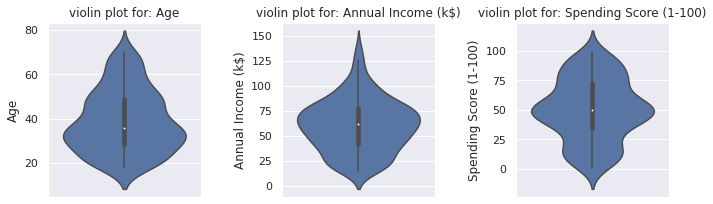

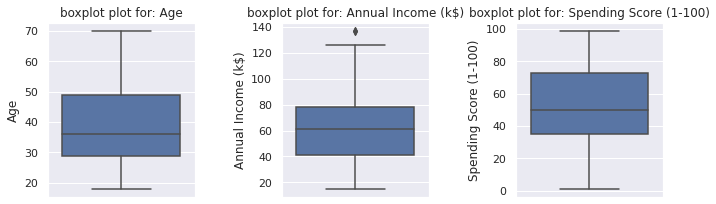

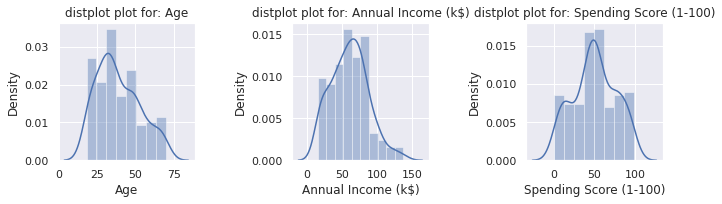

In [49]:
plot_kinds = ['violin','boxplot','distplot']

for item in plot_kinds:
  make_plot(customer_data,item,numerical_columns)

In [50]:
# countplot for gender
customer_data['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

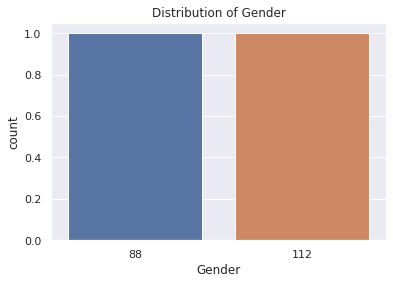

In [53]:
sns.countplot(customer_data['Gender'].value_counts())
plt.title('Distribution of Gender')
plt.show()

**2.2 Relationships between each columns**

In [56]:
customer_data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [58]:
relationship = {
    'Age Vs Income':['Age','Annual Income (k$)'],
    'Age Vs Spending Score':['Age','Spending Score (1-100)'],
    'Gender Vs Annual Income':['Gender','Annual Income (k$)'],
    'Annual Income vs Spending Score':['Annual Income (k$)','Spending Score (1-100)'],
    'Gender Vs Spending Score':['Gender','Spending Score (1-100)']
    }

In [70]:
titles = list(relationship.keys())
#plot_columns

columns_plot= list(relationship.values())
#def relationship_plot(df,titles,columns_plot):


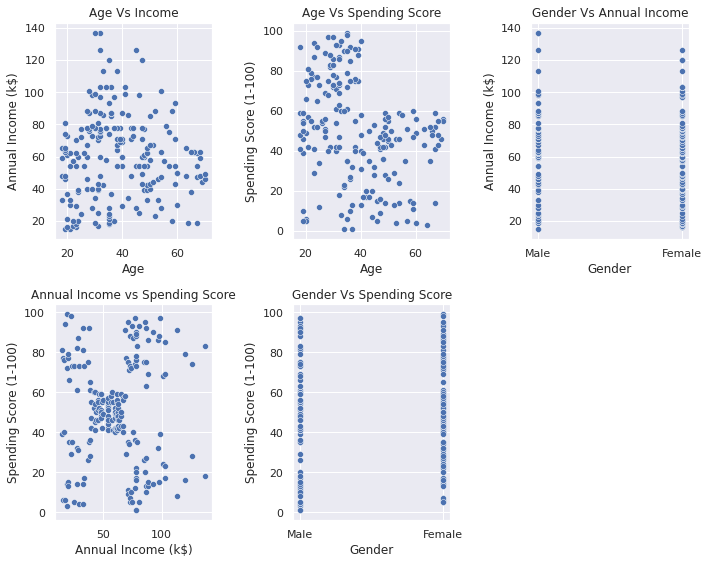

In [89]:
from pandas.core.window.rolling import Axis


def relationship_plot(df,titles,columns_plot):
  fig = plt.figure(figsize=(10,8))
  for index,column_name in enumerate(columns_plot):
    axis = fig.add_subplot(2,3,index+1)
    sns.scatterplot(x=df[column_name[0]],y=df[column_name[1]],ax=axis)
    plt.title(f'{titles[index]}')
  plt.tight_layout()
  plt.show()



relationship_plot(customer_data,titles,columns_plot)




# **3.Preprocessing**

**3.1 Standard Scalling**

In [ ]:
# select only two columns: Annual Income (k$) and Spending Score (1-100)
features = customer_data.iloc[:,[3,4]]
scaler = StandardScaler()
scaled_values = scaler.fit_transform(features)
scaled_values

**Finding optimal number of clusters using Elbow method**

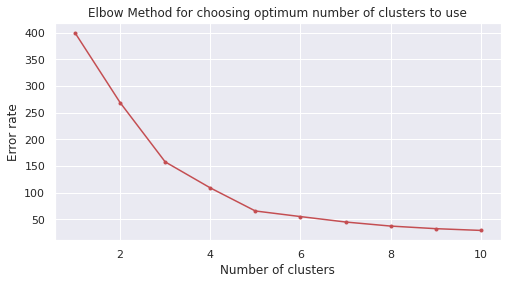

In [99]:
cluster_error = []
cluster_range = range(1,11)

for cluster in cluster_range:
  kmeans = KMeans(n_clusters=cluster,init='k-means++')
  kmeans.fit(scaled_values)
  cluster_error.append(kmeans.inertia_)
plt.figure(figsize=(8,4))
plt.plot(cluster_range,cluster_error,marker = '.',color='r')
plt.xlabel('Number of clusters')
plt.ylabel('Error rate')
plt.title('Elbow Method for choosing optimum number of clusters to use')
plt.show()

**Elbow points 4,3,5**

# **4. Modeling**

In [149]:
def train(n_cluster,train_data,df):
  kmeans = KMeans(n_clusters = n_cluster,init='k-means++',random_state=4)
  kmeans.fit(train_data)
  labels = kmeans.labels_
  return labels

In [150]:
# kmeans with 3 clusters
labels3 = train(3,scaled_values,customer_data)
customer_data['Label3'] = labels3
# kmeans with 4 clusters
labels4 = train(4,scaled_values,customer_data)
customer_data['Label4'] = labels4
# kmeans with 5 clusters
labels5 = train(5,scaled_values,customer_data)
customer_data['Label5'] = labels5



In [157]:
customer_data = customer_data.drop('Cluster_ID',axis=1)


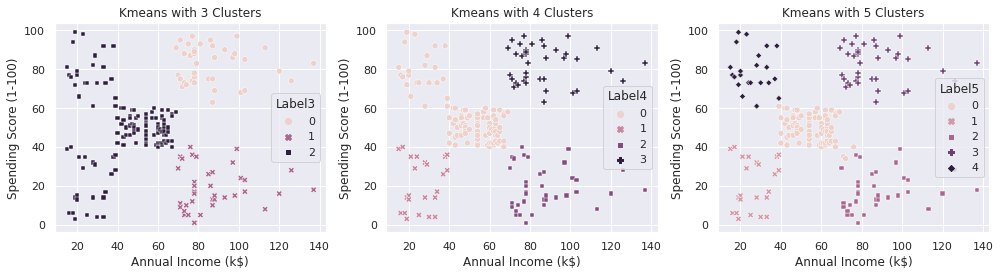

In [163]:
clusters = ['Label3','Label4','Label5']
titles = ['Kmeans with 3 Clusters','Kmeans with 4 Clusters','Kmeans with 5 Clusters']

def cluster_plot(clusters,data,titles):
  fig = plt.figure(figsize=(14,4))
  x=data['Annual Income (k$)']
  y=data['Spending Score (1-100)']

  for index,cluster in enumerate(clusters):
    axis = fig.add_subplot(1,3,index+1)
    sns.scatterplot(x=x,y=y,hue = data[cluster], style =data[cluster],ax=axis)
    plt.title(titles[index])
  plt.tight_layout()
  plt.show()

cluster_plot(clusters,customer_data,titles)
